In [1]:
import numpy as np
import TensorFrost as tf
import matplotlib.pyplot as plt

tf.initialize(tf.cpu, "-O2 -fp:fast -openmp")

blur_d = 16
blur_r = blur_d * 0.5

def kernel(r):
    #return 1.0
    return np.exp(-0.5 * (r / blur_r)**2) / (blur_r * np.sqrt(2.0 * np.pi))

def blur():
    img = tf.input([-1, -1, -1], tf.float32)
    
    blur_h = tf.zeros(img.shape, tf.float32)
    blur_v = tf.zeros(img.shape, tf.float32)
    i, j, ch = img.indices

    #horizontal blur
    for k in range(-blur_d, blur_d+1):
        blur_h += img[i+k, j, ch] * kernel(k)

    #vertical blur
    for k in range(-blur_d, blur_d+1):
        blur_v += blur_h[i, j+k, ch] * kernel(k)

    return [blur_v]

tf_blur = tf.compile(blur)

TensorFrost module loaded!
TensorProgram:
  Kernel count: 2
  Intermediate buffers: 3
  Lines of generated code: 1207
  IR size: 1519



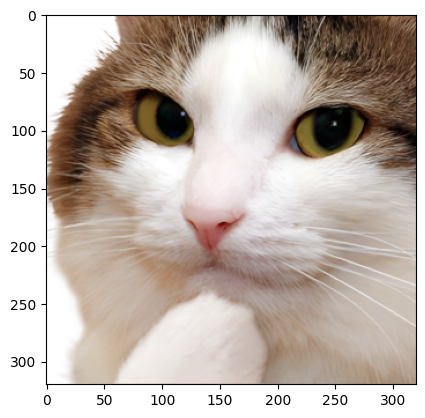

(320, 320, 4)


In [2]:
input_img = np.array(plt.imread("test.png"), dtype=np.float32)
#input_img = input_img[:,:,0:3].reshape(input_img.shape[0], input_img.shape[1], 3)
plt.imshow(input_img)
plt.show()
print(input_img.shape)

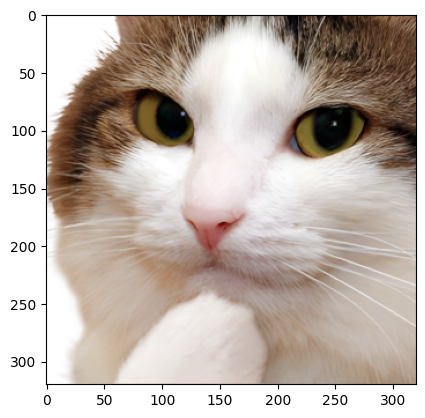

(320, 320, 4)


In [3]:
tf_img = tf.tensor(input_img)
orig_img = tf_img.numpy

plt.imshow(orig_img)
plt.show()
print(orig_img.shape)

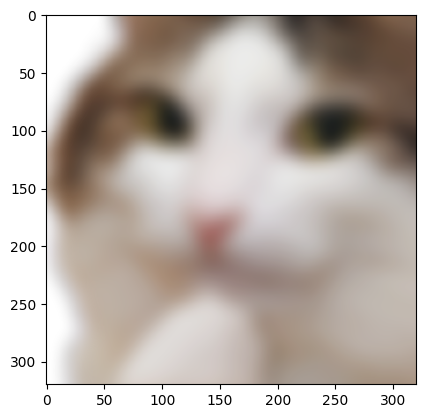

(320, 320, 4)


In [4]:
output_img, = tf_blur(tf_img)

output_numpy = output_img.numpy
plt.imshow(output_numpy)
plt.show()

print(output_numpy.shape)